In [1]:
# Import from https://archive.ics.uci.edu/dataset/60/liver+disorders
# Liver Disorders. (1990). UCI Machine Learning Repository. https://doi.org/10.24432/C54G67  .

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Normalization
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
  
# fetch dataset 
liver_disorders = fetch_ucirepo(id=60) 
  
# data (as pandas dataframes) 
X = liver_disorders.data.features 
y = liver_disorders.data.targets 
  
# metadata 
print(liver_disorders.metadata) 
  
# variable information 
print(liver_disorders.variables) 

# Train / test split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)



{'uci_id': 60, 'name': 'Liver Disorders', 'repository_url': 'https://archive.ics.uci.edu/dataset/60/liver+disorders', 'data_url': 'https://archive.ics.uci.edu/static/public/60/data.csv', 'abstract': 'BUPA Medical Research Ltd. database donated by Richard S. Forsyth', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 345, 'num_features': 5, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['drinks'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C54G67', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each line in the dataset constitutes the record of a single male individual.\n\nImportant note: The 

In [2]:
# Normalization Layer
normalizer = Normalization(input_shape=[5,], axis=None)
normalizer.adapt(XTrain)

# Neural Network
neural_net = Sequential()
neural_net.add(normalizer)
neural_net.add(Dense(20, input_dim =5,kernel_initializer="normal",activation = "relu")) #, kernel_regularizer= regularizers.l1(0.00001)
neural_net.add(Dense(60, input_dim =5,kernel_initializer="normal",activation = "relu")) #, kernel_regularizer= regularizers.l1(0.00001)
neural_net.add(Dense(30, input_dim =5,kernel_initializer="normal",activation = "relu")) #, kernel_regularizer= regularizers.l1(0.00001)
neural_net.add(Dense(1))
neural_net.compile(loss="mean_squared_error",optimizer="adam",metrics="mean_squared_error")
neural_net.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 5)                 3         
 on)                                                             
                                                                 
 dense (Dense)               (None, 20)                120       
                                                                 
 dense_1 (Dense)             (None, 60)                1260      
                                                                 
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3244 (12.68 KB)
Trainable params: 3241 (12.66 KB)
Non-trainable params: 3 (16.00 Byte)
___________________

In [3]:
# Training
history = neural_net.fit(XTrain,yTrain,epochs = 1000, batch_size=2, verbose= True, validation_split=0.2)

Epoch 1/1000


110/110 [==============================] - 2s 5ms/step - loss: 18.1412 - mean_squared_error: 18.1412 - val_loss: 8.1474 - val_mean_squared_error: 8.1474
Epoch 2/1000
110/110 [==============================] - 0s 2ms/step - loss: 11.3735 - mean_squared_error: 11.3735 - val_loss: 7.7070 - val_mean_squared_error: 7.7070
Epoch 3/1000
110/110 [==============================] - 0s 2ms/step - loss: 10.9571 - mean_squared_error: 10.9571 - val_loss: 7.8364 - val_mean_squared_error: 7.8364
Epoch 4/1000
110/110 [==============================] - 0s 2ms/step - loss: 10.6350 - mean_squared_error: 10.6350 - val_loss: 7.8603 - val_mean_squared_error: 7.8603
Epoch 5/1000
110/110 [==============================] - 0s 3ms/step - loss: 10.5045 - mean_squared_error: 10.5045 - val_loss: 7.6543 - val_mean_squared_error: 7.6543
Epoch 6/1000
110/110 [==============================] - 0s 3ms/step - loss: 10.4283 - mean_squared_error: 10.4283 - val_loss: 7.6372 - val_mean_squared_error: 7.6372
Ep

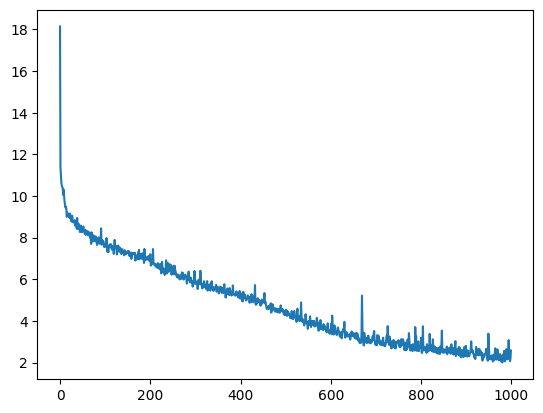

In [4]:
plt.plot(history.history["loss"])

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = neural_net.predict(XTrain)
print(np.sqrt(mean_squared_error(yTrain,pred_train)))

pred_test = neural_net.predict(XTest)
print(np.sqrt(mean_squared_error(yTest,pred_test)))

9/9 [==============================] - 0s 3ms/step
2.0975554979384277
3/3 [==============================] - 0s 3ms/step
4.736645235108358


In [20]:
"""
groupeAp = yp[:,0] > yp[:,1]
groupeBp = yp[:,1] > yp[:,0]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(XTest[groupeAp,0],XTest[groupeAp,1],marker='+',c='k')
ax.scatter(XTest[groupeBp,0],XTest[groupeBp,1],marker='*',c='gray')
#ax.plot(t,b,'r--',lw=2)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.show()"""

"\ngroupeAp = yp[:,0] > yp[:,1]\ngroupeBp = yp[:,1] > yp[:,0]\nfig = plt.figure()\nax = fig.add_subplot(1,1,1)\nax.scatter(XTest[groupeAp,0],XTest[groupeAp,1],marker='+',c='k')\nax.scatter(XTest[groupeBp,0],XTest[groupeBp,1],marker='*',c='gray')\n#ax.plot(t,b,'r--',lw=2)\nax.set_xlabel('$x_1$')\nax.set_ylabel('$x_2$')\nplt.show()"

3/3 [==============================] - 6s 31ms/step


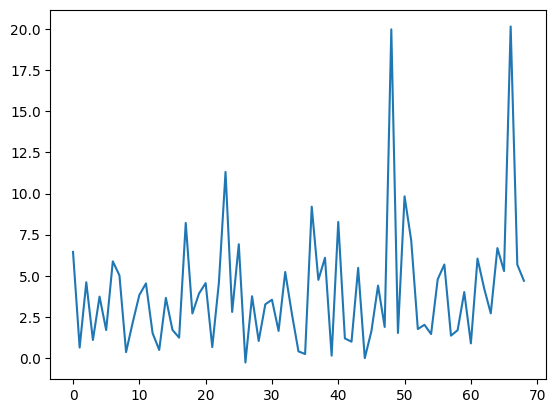

In [21]:
yp = neural_net.predict(XTest)
plt.plot(yp)